# Lecture 3

**Authors:**
* Yilber Fabian Bautista
* Keiwan Jamaly
* Julia Lienert 

**Last date of modification:**
 December 6th 2021

Hello there,

welcome to Lecture 3 of this mini-lecture series on programing with Python. In this series, you will learn basic and intermediate python tools that will be of great use in your scientific carer.

By the end of this lecture you will be able to:
* Do **numerical differentiation** and understand the principles behind it.
* Perform basic **numeric integration** using python integration libraries
* Use several integration techniques including: **the rectangle, the trapezoid and the Simpson's rule**. 
* Do numeric integration in 1 dimensions using quadratures (**quad**)
* Perform higher dimensional integrals using **dblquad, tplquad** 

# Numerical Differentiation

Differentiation is a fundamental tool in science. Naively one would expect the usual derivative definition will  be used for numerics, that is

\begin{equation}
\frac{f(x+h) - f(x)}{h}
\end{equation}

Expanding  $f(x+h)$ around $h=0$ we verify, that it is indeed the differential of $f(x)$.

\begin{equation}
\frac{f(x+h) - f(x)}{h} = \frac{f(x) + hf'(x) + \mathcal{O}(h^2) - f(x)}{h} = f'(x) + \mathcal{O}(h)
\end{equation}

As we can see,  the numerical  errors propagates with $\mathcal{O}(h)$. This is a good approximation to start with, however  we can do better by simply changing our definition of the differential  and expanding around $h=0$
\begin{equation}
\frac{f(x+h) - f(x-h)}{2h} = \frac{f(x) + hf'(x) + h^2/2 f''(x) - (f(x) - hf'(x) + h^2/2 f''(x)) + \mathcal{O}(h^3)}{2h} = f'(x) + \mathcal{O}(h^2)
\end{equation}
This is called the central difference formula and is primarily used for any numerical differentiation, where now the numeric errors propagate as $\mathcal{O}(h^2)$

# Exercise 1
Using the techniques from above, prove that 
\begin{equation}
\frac{f(x+h) -2f(x) + f(x-h)}{h^2} = f''(x) + \mathcal{O}(h^2)
\end{equation}

# Implementations in SciPy

The above numeric differentiation techniques are already implementations in scipy and numpy libraries.

* [scipy.misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html) for calculating derivatives of analytic functions.
* [numpy.gradient](https://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html) for calculating derivatives for  array functions.

both functions use the central difference formula.  

### Example usage (scipy.misc.derivative)
Al already mentioned, SciPy included is the function [scipy.misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html), which allows us to  directly compute the derivative of an analytic  function. The syntax for using `scipy.misc.derivative` function is the following:

```py
scipy.misc.derivative(func, x0, dx=1.0, n=1, args=(), order=3)
```

where `func` is the given function, `x0` the point  the derivative is calculated at, and `dx` is a float for spacing, in our previous formulas `dx=h`.

Let us see an specific example

In [41]:
# include the function 'derivative' from SciPy
from scipy.misc import derivative

# define the function of which the derivative should be taken
def test(x):

    return x**3 + x**2

# calculate the derivative, store the result of the calculation in the variable 'result' and print it
result = derivative(test, 1.0, dx = 1e-6)
print(result)

4.999999999921734


From analytic differentiation, we  would have expected $test'(x)=3x^2+2x$, and evaluating at $x=1$ will produce $test'(1)=5$. The difference with our numeric differentiation is then

In [42]:
result-5

-7.826628234397504e-11

and we can see this is a number approximately of order $\mathcal{O}(dx^2)\approx10^{-12}$. As expected from the central difference formula

### Example usage (if only data points are given)
For the case of not having an analytic function but only data points given, the derivative at each point is calculated using the formula of the centered derivative. Since both the leftmost and rightmost point do not have two neighbouring points, their derivatives are calculated using the forward (for the leftmost point) and the backward (for the rightmost point) derivative.

 **NumPy** includes the  function [np.gradient](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) that does the job for us, provided an array with data points is given. The syntax for using the **np.gradient** function is the following

```py
gradient(f,dx)
```

where `f` is the array with the data points and `dx` is the spacing between the data points.

Notice that the **NumPy** functions for taking derivatives only work for data points given as arrays but not for specific functions. For the latter case, one has to use SciPy. On the other hand, NumPy is faster if the function is given as points on a grid.

Let us see an specific example of how to use the **np.gradient** function in practice

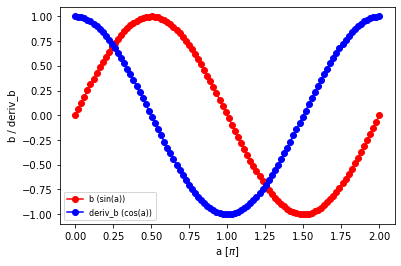

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# note: numpy and matplotlib are already included
# create list of evenly spaced numbers
a = np.linspace(0.0, 2.0*np.pi, 100)

# save the spacing in the variable 'h'; since the numbers in 'a' are evenly spaced it doesn't 
#matter which difference we use
h = a[10] - a[9]

# create array with the sine of that numbers
b = np.sin(a)

# calculate the derivatives of the points in 'b' using the spacing 'h' and store the results in the variable 'deriv_b'
deriv_b = np.gradient(b, h)

# plot the array 'b' and its derivative 'deriv_b'
plt.plot(a/np.pi, b,       marker = 'o', color = 'red',  label = 'b (sin(a))')
plt.plot(a/np.pi, deriv_b, marker = 'o', color = 'blue', label = 'deriv_b (cos(a))')
plt.xlabel(r'a [$\pi$]')
plt.ylabel('b / deriv_b')
plt.legend(loc = 'lower left', fontsize = 8)
plt.show()

# Note: As expected, 'b' shows the sine function and its derivative 'deriv_b' is the cosine!


# Exercise 2
Compute  analytically derivative of $\sin{x}$ and evaluate it at the given `a`-array. Convince yourself that the difference of this result and  the numeric derivative `deriv_b` is approximately of  order $\mathcal{O}(h^2)$. In addition, evaluate the derivative using the  **scipy.misc.derivative**, and compute the difference of this result and the previous two methods of computation. Plot the analytic, and the two numeric derivatives in a scale that makes visible their differences. 

# Exercise 3 (optional)
To get more practice at the computation of numerical derivatives with Python:
1. Calculate the derivative of the function $f(x) = x^4 - 4x^2 + 3x - 1$ at the point $x = 1.5$ both analytically (by hand + using your calculator) and numerically (using $h/dx = 0.1$ and $h/dx = 0.01$). Compare the results. What do you expect to change when using different values for $dx$?
2. Calculate the derivative of the function $g(x) = 1/x$ at the point $x = 0.1$ both analytically (by hand + using your calculator) and numerically (using $h/dx = 0.1$). What happens?

In [44]:
# solution to task 1

In [45]:
# solution to task 2

# Numerical Integration

Given a 1-dimensional integral of the form
$\int_{a}^{b} f(x) dx,$
exploiting the  linearity of the integral, this integral  can be rewrite it as:

$\int_{a}^{b} f(x) dx = \sum_{i=0}^{N} \int_{x_i}^{x_{i+1}} f(x) dx$

where $x_i = a + i h$ and $h = (b-a)/N$. i.e. the  $x_i$ points are  equally spaced.

If $x_i$ and $x_{i+1}$ are close to each other, the integral $\int_{x_i}^{x_{i+1}} f(x) dx$ can be approximated with different forms. 

## Rectangle rule

The rectangle rule is the simplest form of the integral. Each integral in the previous sum is approximated by the area of a rectangle of base $(x_i - x_{i+1})$ and height $ f(\frac{x_i + x_{i+1}}{2})$, i.e. the curve passes through the central points in one of the rectangle's edges. 

$\int_{x_i}^{x_{i+1}} f(x) dx = (x_i - x_{i+1}) f(\frac{x_i + x_{i+1}}{2}) + \mathcal{O}(1/N^2)$

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Integration_rectangle.svg" alt="drawing" width="100%"/>

## Trapezoid rule

A little bit more complex is the trapezoid rule. Each integral in the sum is approximated by the area of a  trapezoid. Notice that the trapezoid has two different  heights, and to compute it's area we have have to evaluate the function at two different $x_i$ values. The area of the trapezoid is then computed by

$\int_{x_i}^{x_{i+1}} f(x) dx = (x_i - x_{i+1}) \frac{f(x_i) + f(x_{i+1})}{2} + \mathcal{O}(1/N^3)$

<img src="https://upload.wikimedia.org/wikipedia/commons/0/03/Integration_trapezoid.svg" alt="drawing" width="100%"/>

## Simpson's rule

The most complicated rule out of the three is the Simpson's rule. The function of each interval is approximated  by a polynomial of order 2 and integrating that polynomial instead of the original function. It's error propagation is of order $\mathcal{O}(1/N^5)$

<img src="https://upload.wikimedia.org/wikipedia/commons/1/13/Integration_simpson.svg" alt="drawing" width="100%"/>

<style>
img {
  background-color: white;
}
</style>

As you can see, the error for these methods evolve differently for different values of $N$. It's important to keep in mind, that different methods also require different numbers of function calls. So if f(x) is a very expensive function without a lot of fluctuations, it's better to use the rectangle rule, than the trapezoid rule.

There is also a way, to vary the size of the intervals, but this is a more advanced method. We will just mention it here, for you to know, that this exists. 

Also keep in mind, that the methods presented here are just the common three out of many which are optimized for different problems. 

[Source of images](https://en.wikipedia.org/wiki/Numerical_integration)



# Exercise 4

Using **numpy**, program the rectangle and trapezoid rules in the next code block to integrate the function $f(x) = e^{-x}$ from $x=0$ to $x=1$. Compare it with the analytic result varying the the number of intervals and see what the difference for the mentioned methods of computation. Plot all your findings

In [46]:
# Write your solutions here


The Simpson's rule is quiet complicated to implement and other integration methods can be even more complicated. For that reason, clever people have already done this for us and bundled them in a library. **Scipy** library contains many methods for numerical integration. We will now take a look at some of them, but a broader implementation  see [here](https://docs.scipy.org/doc/scipy/reference/integrate.html).

## scipy.integrate.quad

Let us first look at the **quad** method, which is made for directly integrating a function. It is based on the FORTRAN library **QUADPACK**. **Scipy** has generally a really good documentation we encourage you to take a look at [it](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad).

Given a 1-dimensional analytic integrand (or interpolated) function  `func`, the 1-dimensional quad integration has the following syntax:
```py
result, error = integrate.quad(func, x_min, x_max,
    args=())
```
where `args` are possible parameters entering in your function. 
Run the commands `import scipy.integrate as integrate` and  `integrate.quad?` for additional documentation

Let us see how to use  **quad** integration with an specific example



In [47]:
import numpy as np
import scipy.integrate as integrate

def f(x):
    return np.exp(-x)

# calculate the integral of 'f' from 0 to 10
result, error = integrate.quad(f, 0, 10)

print(result, error)

0.9999546000702375 2.8326146575791917e-14


The first number gives you the result, the second one the numerical error of the integration. 

While **quad** integration is useful for analytic integrand functions,  other method implemented in the  **scipy** library are of use when having integrand functions that are **np.arrays**. One of such a methods is the already mentioned   **trapezoid** rule.
The syntax for implementation of this integration method is the following:

```py
scipy.integrate.trapezoid(y, x=None, dx=1.0, axis=- 1)
```
or 
```py
scipy.integrate.trapz(y, x=None, dx=1.0, axis=- 1)
```
Integrate along the given axis using the composite trapezoidal rule

Let us see an specific example of this

In [48]:
x = np.linspace(0, 100, 1000)
y = f(x)

integrate.trapz(y, x)

1.000834863090761

As you can see, the result is fairly similar to the quad method, but you don't have an error estimate.

The last method we will be presenting here, is the **simpson** method, which works similar as the trapezoid method. The syntax for the implementation is:

```py
scipy.integrate.simpson(y, x=None, dx=1.0, axis=- 1)
```
or 
```py
scipy.integrate.simps(y, x=None, dx=1.0, axis=- 1)


In [49]:
x = np.linspace(0, 100, 1000)
y = f(x)
integrate.simps(y, x)

1.0000402922553666

We have then learnt that depending  on the problem we  are trying to solve we can use either of the different integration methods in **scipy** library.  While **quad** works just with functions and the step size is estimated on the fly, the implementation of the **trapezoid** and **simpson** methods work on arrays. Keep in mind that one can convert an array into a function and a function into an array, for that, you we have prepared an  optional section on  interpolating functions, which we will extend in Lecture 7. 

In [50]:
integrate.quad(f,0,np.inf)

(1.0000000000000002, 5.842606742906004e-11)

# Exercise 5
In this exercise we will compute numerically the  integral of the function 

$$y(x,a) = \int_0^{x} e^{-a\phi^2} d\phi,$$
using the **quad** integration method described above. Here  $a$ is a positive real number. For $x\to \infty$, this integral has an analytic result 

$$\int_0^{\infty} e^{-a x^2} dx = \sqrt{\frac{\pi}{4a}}$$

which we will use to compare to our numeric integration. 

1. Write a function, which represents the integrand and a function y(x,a) which calculates the integral. 
Recall the **quad** function allows for integration when parameters are included inside the integrand, as well as infinite integration interval.

2. Check that your function is well defined  by calculating y(np.inf,10) and compared to the analytic result using a = 10.

3. Use the interval x = np.linspace(0, 100, 100) to evaluate y(x,10)

5. Plot your result. 

In [51]:
# Write your results here

# double integral (dblquad)

Higher dimensional integration is also possible to perform, in particular, two for two dimensions we have the  `scipy.integrate.dblquad` at hand. 
For instance,  the area of a circle in cartesian coordinates can be computed from the double integral

$A = \int_{x=-1}^{1} \int_{y=-\sqrt{1-x^2}}^{\sqrt{1-x^2}} dy dx$


To understand this further, lets rewrite the integral, to make the variables match with the [documentation](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.dblquad.html#scipy.integrate.dblquad)

$\int_{x=a}^{b} \int_{y=\text{gfun}(x)}^{\text{hfun}(x)} \text{fun}(y,x) dy dx$

where:

$a = -1$  
$b = 1$  
$\text{gfun}(x) = -\sqrt{1-x^2}$  
$\text{hfun}(x) = \sqrt{1-x^2}$  
$\text{fun}(y,x) = 1$

Let's program this integral using our `dblquad` documentation 

In [52]:
a = -1
b = 1

def gfun(x):
    return -np.sqrt(1-x**2)

def hfun(x):
    return np.sqrt(1-x**2)

def fun(y, x): # the order of the arguments is important
    return 1


integrate.dblquad(fun, a, b, gfun, hfun)

(3.1415926535897967, 2.000470900043183e-09)

And it is as easy as that! 

# Exercise 4

Using the same approach, calculate the volume of a sphere in three dimensional euclidean space and use the function [tplquad](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.tplquad.html#scipy.integrate.tplquad)

In [53]:
# Write your code here

# Interpolation (optional)

Given two arrays with data points (y, x), we have precise values where the data points are recorded, but sometimes one wants an estimate of the values in between these data points. A process called interpolation helps us to do this. We will roughly outline interpolation and discuss it in detail in  Lecture 7. 

Let's say that we have the following data points:

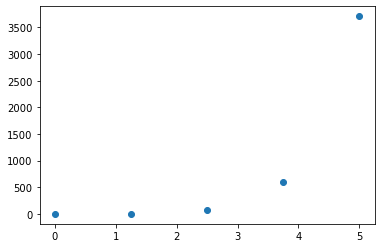

In [54]:
x = np.linspace(0.0, 5, 5)

y = x**2*np.exp(x)

plt.scatter(x, y)

As you can see, these are singular dots. So a value of x=3 doesn't exist. The easies way to solve this, is a linear interpolation. This basically means, drawing a straight line between the points. This can be done with the `scipy.interpolate.interp1d` function. 

In [55]:
import scipy.interpolate as interpolate

y_linear = interpolate.interp1d(x, y)

y_linear(3)

array(284.8654386)

[scipy.interpolate.interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d) generates a function in the domain $(min(x), max(x))$ It easily can be understood by plotting it with a high point density, to see that it truly continuous.

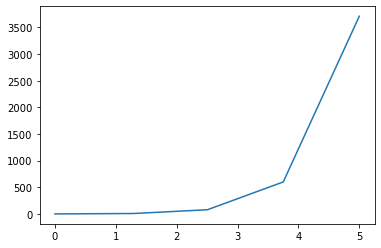

In [56]:
x_high_density = np.linspace(0.0, 5, 10000)

plt.plot(x_high_density, y_linear(x_high_density))

There is also the possibility to use a quadratic formula for interpolation,to ensure, that the first derivative is also continuous. 

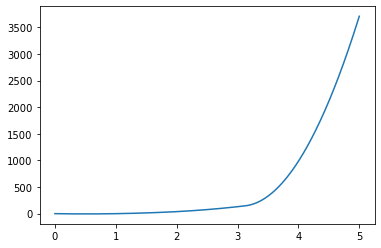

In [57]:
y_quadric = interpolate.interp1d(x, y, kind=2)

x_high_density = np.linspace(0.0, 5, 10000)

plt.plot(x_high_density, y_quadric(x_high_density))

A nice little hack to know is, that if you function is bijective, you can calculate the inverse with the inverse interpolation. 

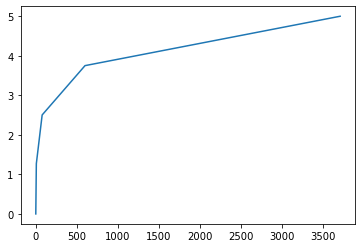

In [58]:
y_inverse_quadric = interpolate.interp1d(y, x, kind=1) # normally it is x, y

x_inverse_high_density = np.linspace(y.min(), y.max(), 10000)

plt.plot(x_inverse_high_density, y_inverse_quadric(x_inverse_high_density))

there exist also interpolations for 'cubic', 'nearest', etc. depending on the problem you like to solve. Normally you need to experiment a little, to find the one, which fit's the best. 